In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uit-x-thpt-stress-dataset/train.csv
/kaggle/input/uit-x-thpt-stress-dataset/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/uit-x-thpt-stress-dataset/train.csv')

print(train_df)
print(train_df.columns)

     anxiety_level  self_esteem  mental_health_history  depression  headache  \
0               13           25                      1          10         2   
1               19           11                      1          25         4   
2                1           25                      0           3         1   
3               15           10                      1          17         4   
4                7           27                      0           0         1   
..             ...          ...                    ...         ...       ...   
875              9           23                      1          24         4   
876             17           12                      1          22         4   
877             16           12                      1          15         4   
878              8           30                      0           4         1   
879             14           12                      0          24         0   

     blood_pressure  sleep_quality  bre

<h1> EDA </h1>

<h2 style = 'font-size: 25px'> Psychological Factor </h2>


Index(['anxiety_level', 'self_esteem', 'mental_health_history', 'depression'], dtype='object')
the field anxiety_level lacks 0
the field self_esteem lacks 0
the field mental_health_history lacks 0
the field depression lacks 0


'\nTừ việc phân tích đơn biến, ta có thể thấy rằng:\nanxiety_level: \n- anxiety_level: thấp thì sẽ không có stress\n- anxiety vừa: thì đa số sẽ tạo ra eugenic stress\n- anxiety cao: đa số dẫn đến distress\n\nself_esteem (mức đánh giá bản thân): \n- cao (từ ): không stress\n- vừa: eugenic stress (kiểu ngang)\n- thấp: distress\n\nmental_health_factor(có tiền sử tâm lý):\n0: hầu như là ko stress/eugstress\n1: hầu như là distress/eutress\n\ndepression: giống như anxiety_level\n'

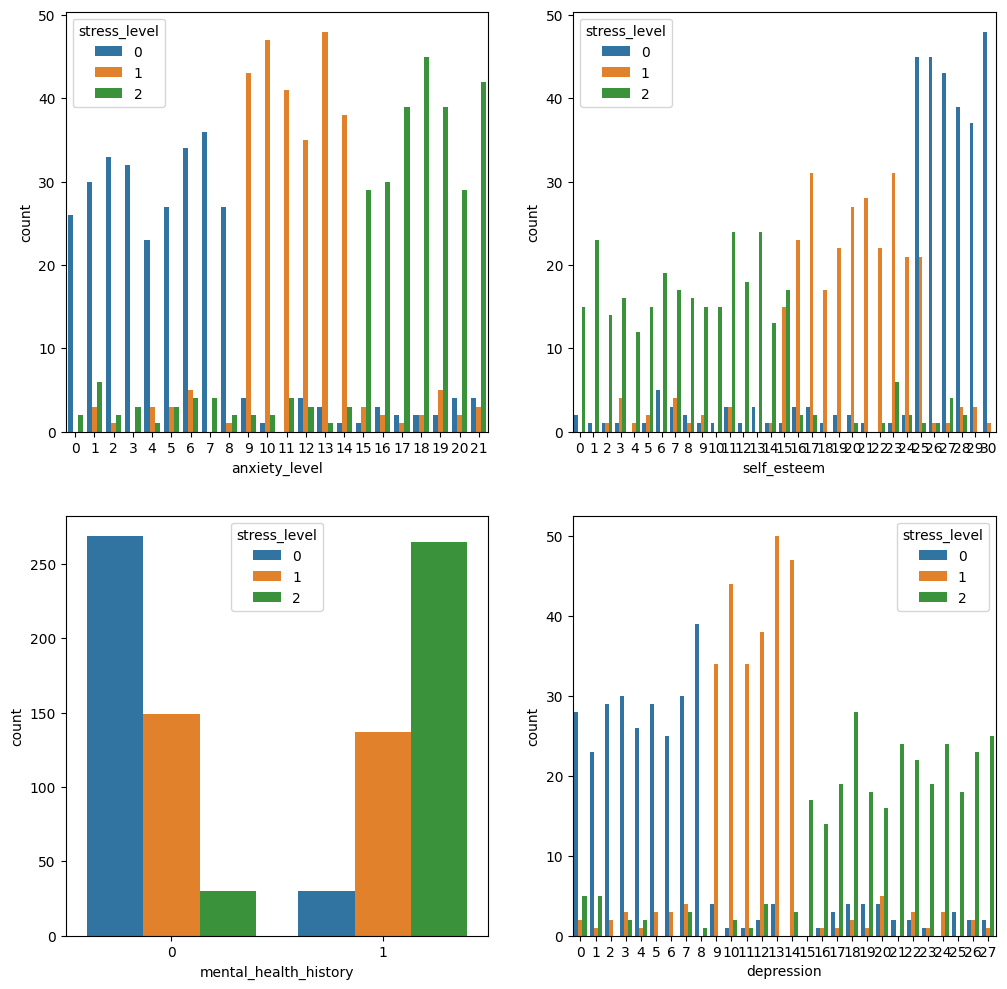

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[0:4]
print(columns)

# sns.countplot(x = train_df['anxiety_level'], hue = train_df['stress_level'])
fig, axs = plt.subplots(2, 2, figsize = (12, 12))
for i in range(2):
    for j in range(2):
        sns.countplot(x = train_df[columns[i * 2 + j]], hue = train_df['stress_level'], ax = axs[i, j])

for i in range(2):
    for j in range(2):
        print(f'the field {columns[i * 2 + j]} lacks {sum(train_df[columns[i * 2 + j]].isna())}')

'''
Từ việc phân tích đơn biến, ta có thể thấy rằng:
anxiety_level: 
- anxiety_level: thấp thì sẽ không có stress
- anxiety vừa: thì đa số sẽ tạo ra eugenic stress
- anxiety cao: đa số dẫn đến distress

self_esteem (mức đánh giá bản thân): 
- cao (từ ): không stress
- vừa: eugenic stress (kiểu ngang)
- thấp: distress

mental_health_factor(có tiền sử tâm lý):
0: hầu như là ko stress/eugstress
1: hầu như là distress/eutress

depression: giống như anxiety_level
'''

<h2> Physiological factors</h2>

Index(['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'], dtype='object')
the field headache lacks 0
the field blood_pressure lacks 0
the field sleep_quality lacks 0
the field breathing_problem lacks 0


'\nheadache: \n0: cân bằng\ntừ 1-5: chuyển dịch dần từ 0-->2\n- Nhóm 3: đặc biệt khi nó là điểm giao thoa giữa hai nhóm eustress và distress.\n\nblood_pressure: \n1: eustress\n2: ko stress\n3: chủ yếu là distress\n\nsleep_quality:\n0: như nhau - indecisive\n1-5: distress --> eugenic --> ko stress\n\nbreathing problem:\n0: như nhau.\n1: no stress\n2: eugenic stress + no_stress\n3, 4, 5: distress chiếm một lượng rất lớn.\nđặc biệt có 4: lại tạo ra eugenic stress\n'

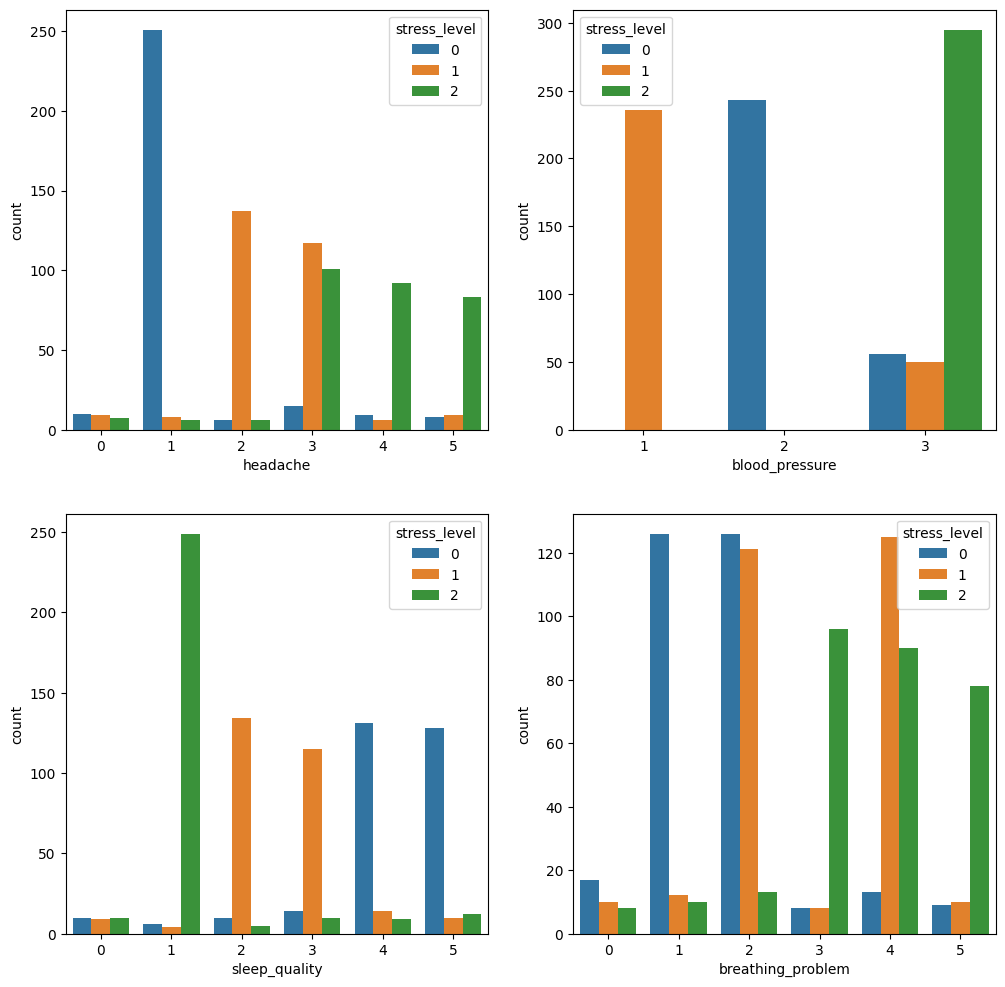

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[4:8]
print(columns)

# sns.countplot(x = train_df['anxiety_level'], hue = train_df['stress_level'])
fig, axs = plt.subplots(2, 2, figsize = (12, 12))
for i in range(2):
    for j in range(2):
        sns.countplot(x = train_df[columns[i * 2 + j]], hue = train_df['stress_level'], ax = axs[i, j])

for i in range(2):
    for j in range(2):
        print(f'the field {columns[i * 2 + j]} lacks {sum(train_df[columns[i * 2 + j]].isna())}')


'''
headache: 
0: cân bằng
từ 1-5: chuyển dịch dần từ 0-->2
- Nhóm 3: đặc biệt khi nó là điểm giao thoa giữa hai nhóm eustress và distress.

blood_pressure: 
1: eustress
2: ko stress
3: chủ yếu là distress

sleep_quality:
0: như nhau - indecisive
1-5: distress --> eugenic --> ko stress

breathing problem:
0: như nhau.
1: no stress
2: eugenic stress + no_stress
3, 4, 5: distress chiếm một lượng rất lớn.
đặc biệt có 4: lại tạo ra eugenic stress
'''


<h2>Environmental Factors</h2>

Index(['noise_level', 'living_conditions', 'safety', 'basic_needs'], dtype='object')
the field noise_level lacks 0
the field living_conditions lacks 0
the field safety lacks 0
the field basic_needs lacks 0


'\nnoise level: \n0: cân bằng\ntừ 1-5: chuyển dịch dần từ 0-->2\n\nliving conditions: \ndistress --> eustress --> stress\nđặc biệt: 5 là như nhau --> bởi vì nó sẽ ko còn trọng số, đó nó sẽ không còn phụ thuộc vào living conditions nữa.\n\nsafety:\n0: như nhau - indecisive\n1-5: distress --> eugenic --> ko stress\n\nbasic needs:\n0: như nhau.\ndistress --> eugenic --> no stress\n'

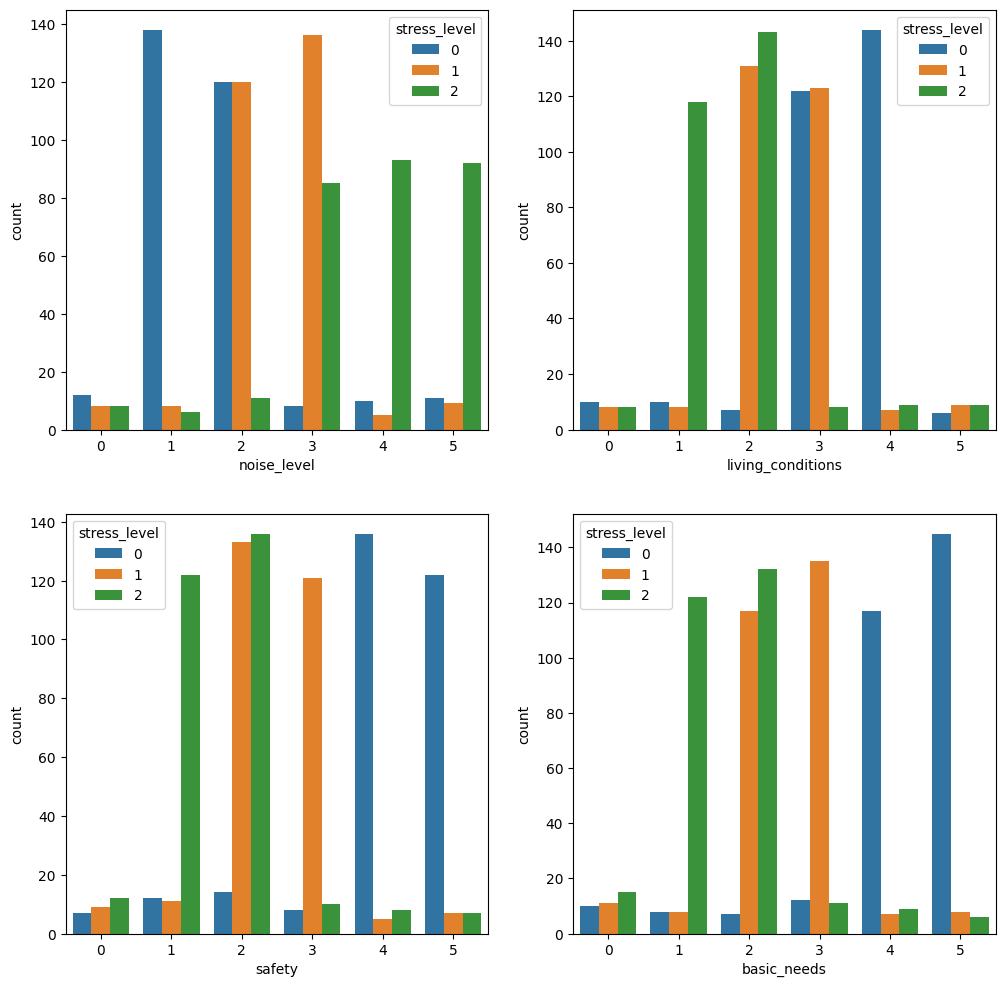

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[8:12]
print(columns)

# sns.countplot(x = train_df['anxiety_level'], hue = train_df['stress_level'])
fig, axs = plt.subplots(2, 2, figsize = (12, 12))
for i in range(2):
    for j in range(2):
        sns.countplot(x = train_df[columns[i * 2 + j]], hue = train_df['stress_level'], ax = axs[i, j])

for i in range(2):
    for j in range(2):
        print(f'the field {columns[i * 2 + j]} lacks {sum(train_df[columns[i * 2 + j]].isna())}')

'''
noise level: 
0: cân bằng
từ 1-5: chuyển dịch dần từ 0-->2

living conditions: 
distress --> eustress --> stress
đặc biệt: 5 là như nhau --> bởi vì nó sẽ ko còn trọng số, đó nó sẽ không còn phụ thuộc vào living conditions nữa.

safety:
0: như nhau - indecisive
1-5: distress --> eugenic --> ko stress

basic needs:
0: như nhau.
distress --> eugenic --> no stress
'''

<h2>Academic Factors</h2>

Index(['academic_performance', 'study_load', 'teacher_student_relationship',
       'future_career_concerns'],
      dtype='object')


'\nnoise level: \n0: cân bằng\ntừ 1-5: chuyển dịch dần từ 0-->2\n\nliving conditions: \ndistress --> eustress --> stress\nđặc biệt: 5 là như nhau --> bởi vì nó sẽ ko còn trọng số, đó nó sẽ không còn phụ thuộc vào living conditions nữa.\n\nsafety:\n0: như nhau - indecisive\n1-5: distress --> eugenic --> ko stress\n\nbasic needs:\n0: như nhau.\ndistress --> eugenic --> no stress\n'

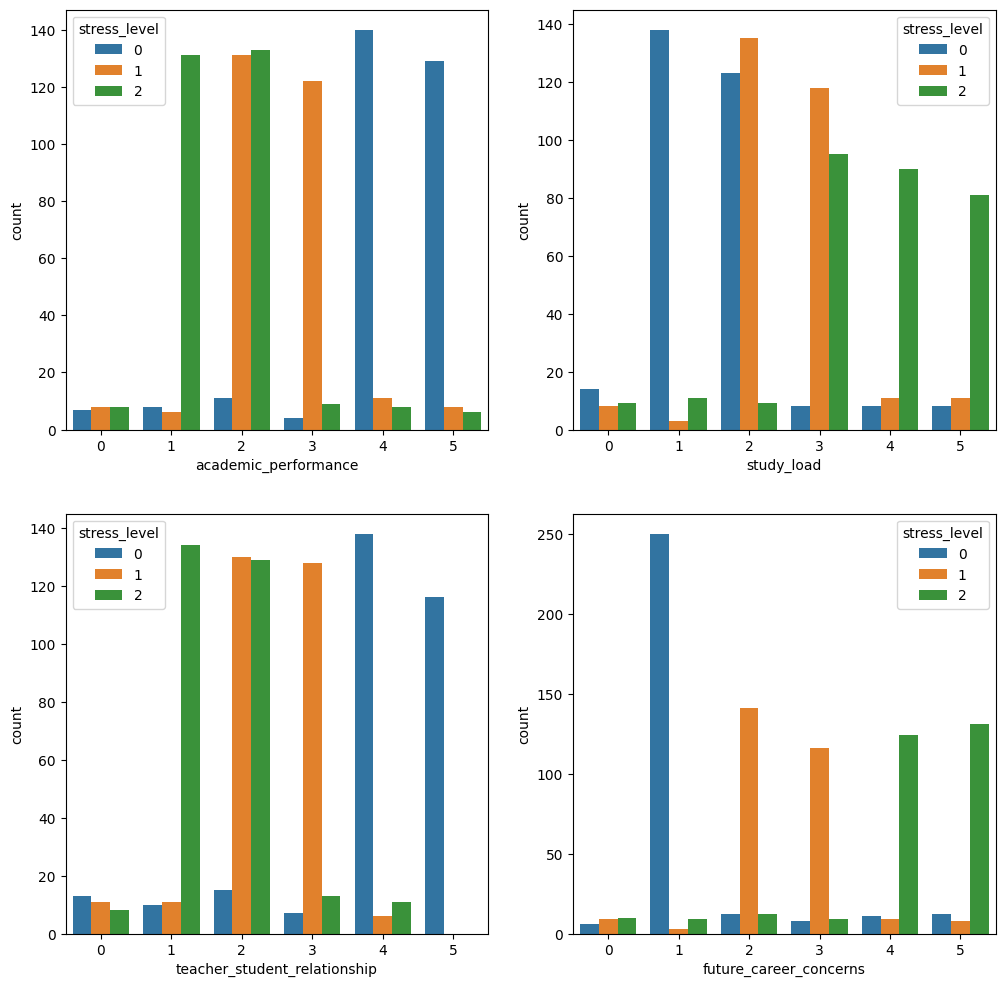

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[12: 16]
print(columns)

# sns.countplot(x = train_df['anxiety_level'], hue = train_df['stress_level'])
fig, axs = plt.subplots(2, 2, figsize = (12, 12))
for i in range(2):
    for j in range(2):
        sns.countplot(x = train_df[columns[i * 2 + j]], hue = train_df['stress_level'], ax = axs[i, j])

'''
academic performance: 
0: cân bằng
từ 1-5: chuyển dịch dần từ 2-->0

study load: 

0: cân bằng
từ 1-5: no stress --> no stress / eugenic --> eugenic / distress --> distress

teacher-student relationship:
0: như nhau - indecisive
1-5: distress --> eugenic | distress --> ko stress

future careers concern:
0: như nhau.
distress --> eugenic --> no stress
'''

<h2>Social Factors</h2>

Index(['social_support', 'peer_pressure', 'extracurricular_activities',
       'bullying'],
      dtype='object')


'\nacademic performance: \n0: cân bằng\ntừ 1-5: chuyển dịch dần từ 2-->0\n\nstudy load: \n\n0: cân bằng\ntừ 1-5: no stress --> no stress / eugenic --> eugenic / distress --> distress\n\nteacher-student relationship:\n0: như nhau - indecisive\n1-5: distress --> eugenic | distress --> ko stress\n\nfuture careers concern:\n0: như nhau.\ndistress --> eugenic --> no stress\n'

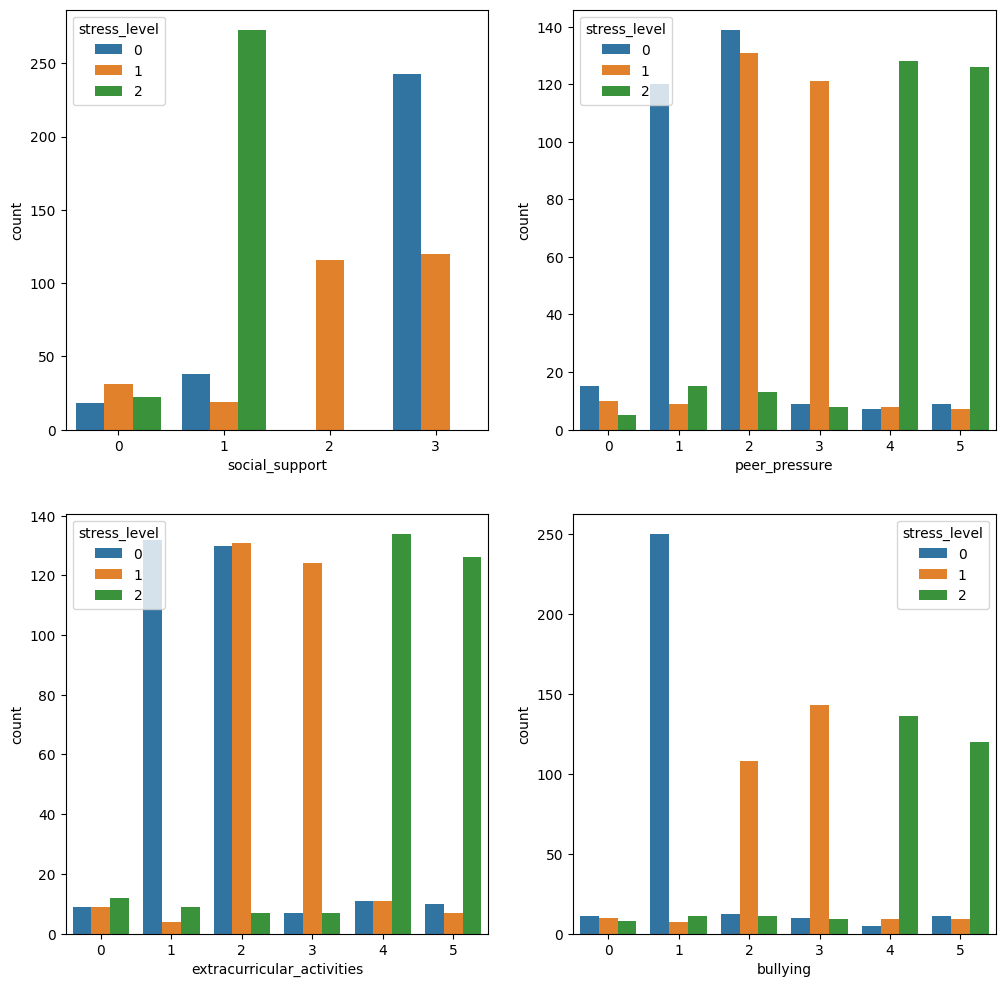

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = train_df.columns[16: 20]
print(columns)

# sns.countplot(x = train_df['anxiety_level'], hue = train_df['stress_level'])
fig, axs = plt.subplots(2, 2, figsize = (12, 12))
for i in range(2):
    for j in range(2):
        sns.countplot(x = train_df[columns[i * 2 + j]], hue = train_df['stress_level'], ax = axs[i, j])

'''
social support: 
0: same
1->2->3: distress --> eugenic stress --> no stress

peer pressure: 

0: same
1->5: no stress --> eugenic stress --> distress

Extra-curricular activities:
0: same
1->5: no stress --> eugenic stress --> distress

bullying:
0: như nhau.
1->5: distress --> eugenic stress --> no stress

'''

<h1>Mô hình</h1>

<h2> Majority-voting Classification </h2>

In [86]:
df = train_df

group = []
group_df = []
for i in range(5):
    group.append(df.columns[(i * 4) : (i + 1) * 4])
    group_df.append(df[group[i]])


     anxiety_level  self_esteem  mental_health_history  depression
0               13           25                      1          10
1               19           11                      1          25
2                1           25                      0           3
3               15           10                      1          17
4                7           27                      0           0
..             ...          ...                    ...         ...
875              9           23                      1          24
876             17           12                      1          22
877             16           12                      1          15
878              8           30                      0           4
879             14           12                      0          24

[880 rows x 4 columns]


In [3]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import torch.nn.functional as F
from sklearn.model_selection import train_test_split


In [5]:
class ClassifyingModel(nn.Module):
    '''
    Một mô hình Phân loại đơn giản với 4 layer:
    Layer1: FC(input_dim --> 1024) + ReLU
    Layer2: FC(1024 --> 1024) + dropout
    Layer3: FC(1024 --> 1024) + ReLU
    Classify: FC(1024, 3)
    '''
    def __init__(self, input_dim, output_dim, dropout = 0.3):
        super().__init__()
        self.fc1 = nn.Linear(input_dim, 1024)
        self.fc2 = nn.Linear(1024, 1024)
        self.fc3 = nn.Linear(1024, 1024)
        self.classifcation_head = nn.Linear(1024, output_dim)
        self.relu = F.relu
        self.dropout = nn.Dropout(p = dropout)
        
    def forward(x):
        x1 = self.fc1(x)
        x1 = self.relu(x)
        
        x2 = self.fc2(x1)
        x2 = self.dropout(x1)

        x3 = self.fc3(x2)
        x3 = self.relu(x2)

        logits = self.classification_head(x3)
        return logits
        
        
def train_model(input, target, epochs = 50, test_size = 0.2, dropout_p = 0.1):
    '''
    Return a model that is trained on the dataset X, y
    The training steps are as followed:
    - Split the set into 2 sets of training and validating.
    - Train model
    '''
    epochs = epochs
    train_input, train_output, validate_input, validate_output = sklearn.model_selection(input, target, test_size = test_size)

    X_train, X_valid = torch.tensor(train_input), torch.tensor(validate_input)
    y_train, y_valid = torch.tensor(train_output), torch.tensor(validate_output)

    train_batch = Dataset(X_train, y_train)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(lr = 0.0001, weight_decay = 1e-4)

    # for epoch in range(epochs):
        
    
        
    
    
    
    return 0

model = ClassifyingModel(4, 3)
tgt = group_df[0]['stress_level'].values
inp = group_df[0].drop('stress_level').values
print(tgt, inp)
_ = train_model()
print(model)
    

NameError: name 'group_df' is not defined